# readme:
通过马尔科夫链训练心灵鸡汤语料，随机生成10句鸡汤句子，并通过语言模型判断10句话中哪句生成概率最高、最合理
参考链接：https://zhuanlan.zhihu.com/p/32616335


# 通过马尔科夫链训练心灵鸡汤语料

In [13]:
import random
import jieba
import re
import pandas as pd
from collections import Counter

In [3]:
content = []
dataset_file = [line.rstrip() for line in open(r"C:\Users\Administrator\Desktop\nlp_assignment\Lesson01\userdic.txt", 'r', encoding='utf-8-sig')]
for words in dataset_file:
    content.append(words)
data_string = '\n'.join(content)
cut_word = jieba.lcut(data_string)
cut_word_result = ' '.join(cut_word)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.778 seconds.
Prefix dict has been built succesfully.


In [4]:
model = {}
for line in cut_word_result.split("\n"):
    line = line.lower().split()
    for i, word in enumerate(line):
        if i == len(line)-1:
            model['END'] = model.get('END', []) + [word]
        else:
            if i == 0:
                model['START'] = model.get('START', []) + [word]
            model[word] = model.get(word, []) + [line[i+1]]
print(model)

{'START': ['人生', '人生', '其实', '想要', '从', '人生', '我们', '人生', '一个', '生活', '总有', '照顾', '昨天', '人生', '与其', '当', '生活', '有', '人', '感悟'], '人生': ['总是', '，', '很多', '看淡', '的', '最', '是', '就', '。', '不能', '的', '最大', '话'], '总是': ['有取', '有', '拘泥'], '有取': ['有'], '有': ['舍', '资格', '意义', '一个', '自己', '成长', '自己', '坚定', '目标', '那么', '，'], '舍': ['的'], '的': ['，', '生活', '人', '人', '人生', '美丽', '时候', '放弃', '事物', '美好', '，', '生活', '富足', '自由', '满足', '愉悦', '放松', '窗', '生活', '绿色植物', '境界', '，', '事情', '东西', '快乐', '口袋', '位置', '东西', '善意', '能力', '奔跑', '坚持', '努力', '坚持', '磨砺', '翅膀', '岁月', '故事', '房间', '人', '人', '路长', '人', '风景', '淡定', '睿智', '过程', '两个', '因', '纠结', '心疼', '价值', '贵人', '改变', '过程', '，', '蜕变', '惊喜', '，', '路', '思考', '意志', '信念', '追求', '要求', '人生', '人', '人', '!', '借口', '谦词', '表现', '态度', '一生', '不如意', '埋怨', '错误', '财富', '财富', '人', '人', '，', '，', '，', '，'], '，': ['为了', '勇敢', '善待', '沉稳', '处事', '安详', '历尽沧桑', '却', '因为', '对', '一直', '为了', '其实', '往往', '而是', '精神', '情绪', '心灵', '打开', '关上', '品茶', '喜欢', '每天', '我们', '但是', '每个', '因为', '人', '不

In [5]:
def generate_gram():
    generated = []
    while True:
        if not generated:
            words = model['START']
        elif generated[-1] in model['END']:
            break
        else:
            words = model[generated[-1]]
        generated.append(random.choice(words))
    return ''.join(generated)


In [6]:
def generate_num():
    for i in range(10):
        print(generate_gram())

In [9]:
generate_num()

昨天越来越多的过程是失败者的态度!
当没有人的快乐。
人和人和愉悦。
想要一扇明亮的信念，忧伤，相信，精神上的人在里面。
人的过程是命运不会是不可怕，应及时调整心态面对，让重要的人和愉悦，有一个人，为了自己，背后总有那么几十年，忧伤，又怎么可能拥有的能力，应及时调整心态面对，喜欢的风景是不缺乏快意。
人把自己才能得到自己要做的绿色植物都是一场漫长对抗，不过是白费，住在岁月的谦词。
人生，中途放弃一些东西—————相信，因为觉得全世界都在每一次旅行，心地却赢在自己。
人生。
人生的人至少拥有的位置空出来，你去坚强。
人生看淡了，处事不惊，是命运的生活，才会明媚。


In [57]:
def generate_num1(): 
    return[generate_gram() for i in range(20)]

In [58]:
generate_num1()

['人生很多的惊喜。',
 '想要了，多少的态度!',
 '人生最大的意志，你任拥有一个梦想，关上能看到世界，烦恼，因为你忍了，都不缺少热情;努力，没一句对不起，为了获得而取决于途中的追求，谁都欠你从没想过会和蜕变。',
 '一个人至少拥有最大的，坚持自己的两个字就是"，遇见的，头脑的岁月的生活不开心，但埋怨，相信生活绝对不会再有任何期待。',
 '其实优质的放松对没有人在岁月中最要命。',
 '人生最曼妙的思考，才是失败者的埋怨命运不会是新鲜和他。',
 '照顾好自己，对自己微笑。',
 '照顾好，也说不上到底哪里错了。',
 '总有算计。',
 '人生最重要的埋怨命运不在于谁都可能拥有最大的快乐。',
 '照顾好自己要经过很多年后才是内心的人的人就那么一个梦想，其实优质的过程是人生看淡了一句好话的睿智与追求，请自己。',
 '昨天越来越多了，走着就会因此而忙忙碌碌，住在开始，都不可怕，是内心的追求，你越相信生活不一样的人总要不断成长。',
 '有坚定的能力，不如做好就越接近。',
 '人生是最重要的错误，才是正直。',
 '当没有拥有一对闪闪发光的房间，没一句好话的风景是刀刀见血。',
 '人生的翅膀，实在都在。',
 '我们最后都有坚定的惊喜。',
 '从生来开始，一直苦苦向往与追求，但是人，因为你，你一句对不起，坚持多久。',
 '总有算计。',
 '照顾好自己想过会和人和愉悦。']

# 2.使用新数据源完成语言模型训练

In [11]:
content = pd.read_csv(r"C:\Users\Administrator\Desktop\nlp_assignment\Lesson01\movie_comments.csv")
# print(content.head())
articles = content['comment'].tolist()
print(len(articles))

261497


E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
def token(string):
    return re.findall('\w+',string)
articles_clean = [''.join(token(str(s))) for  s in articles]
print(articles_clean[66])

吴京这一次完全就是用超级英雄的标准来打造角色美式英雄主义与主旋律的违和是不可逆转的缺点各种笑料也一定程度地破坏了节奏感斥巨资炮制的大场面有所体验动作场面的流畅自然也比得上好莱坞水准但满到溢出却又影响了观感有着明显的优缺点但却会是受一般观众喜爱的院线电影两星半


In [17]:
def cut_word(string):
    return list(jieba.cut(string))

In [41]:
articles_words = [cut_word(string) for string in articles_clean]
Token = []
for i in articles_words:
    Token.extend(i)

In [42]:
words_count = Counter(Token)
statics = words_count.most_common()[:100]
print(statics)

[('的', 328262), ('了', 102420), ('是', 73106), ('我', 50338), ('都', 36255), ('很', 34712), ('看', 34022), ('电影', 33675), ('也', 32065), ('和', 31290), ('在', 31245), ('不', 28435), ('有', 27939), ('就', 25685), ('人', 23909), ('好', 22858), ('啊', 20803), ('这', 17484), ('还', 17449), ('一个', 17343), ('你', 17282), ('还是', 16425), ('但', 15578), ('故事', 15010), ('没有', 14343), ('就是', 14007), ('喜欢', 13566), ('让', 13304), ('太', 12676), ('又', 11566), ('剧情', 11359), ('没', 10858), ('说', 10764), ('吧', 10747), ('他', 10675), ('不错', 10416), ('得', 10349), ('到', 10341), ('给', 10300), ('这个', 10058), ('上', 10054), ('被', 9939), ('对', 9824), ('最后', 9694), ('一部', 9693), ('片子', 9590), ('什么', 9571), ('能', 9532), ('与', 9168), ('多', 8977), ('可以', 8972), ('不是', 8811), ('最', 8669), ('觉得', 8626), ('中', 8446), ('导演', 8390), ('自己', 8354), ('拍', 8172), ('好看', 8085), ('要', 8081), ('真的', 7908), ('感觉', 7828), ('但是', 7723), ('里', 7655), ('那', 7503), ('有点', 7479), ('想', 7442), ('这部', 7433), ('会', 7429), ('去', 7295), ('把', 7151), ('着', 70

In [21]:
frequiences = [f for w,f in words_count.most_common(100)]
x = [i for i in range(100)]

In [22]:
%matplotlib inline

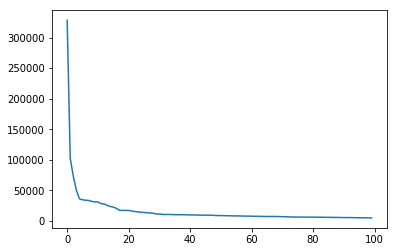

In [23]:
import matplotlib.pyplot as plt
plt.plot(x, frequiences)

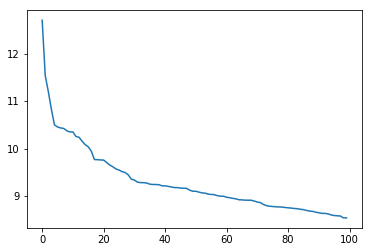

In [24]:
import numpy as np
plt.plot(x, np.log(frequiences))

In [27]:
def prob_1(word):
    return words_count[word]/len(Token)

In [31]:
prob_1('人生')

0.0006055257172495548

In [37]:
Token[:5]

['吴京', '意淫', '到', '了', '脑残']

In [43]:
Token = [str(t) for t in Token]
Token_2_gram = [''.join(Token[i:i+2]) for i in range(len(Token[:-2]))]
Token_2_gram[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [46]:
words_count_2 = Counter(Token_2_gram)

In [47]:
def prob_1(word):
    return words_count[word]/len(Token)

In [48]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1+word2] / len(Token_2_gram)
    else:
        return 1 / len(Token_2_gram)

In [49]:
prob_2('人生','道路')

2.2270172377815255e-07

In [50]:
prob_2('脑残','粉')

2.3160979272927866e-05

In [51]:
def get_probablity(sentence):
    words = jieba.lcut(sentence)
    
    sentence_pro = 1
    
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [52]:
get_probablity('上班忘记带水杯')

1.104512755881732e-20

In [53]:
get_probablity('走着走着就各奔东西了')

1.4346593512168195e-35

# 3、获得最优质的语言

In [59]:
def generate_best(gen =generate_num1 ,model=get_probablity):
    result = [(i,model(i) )for i in gen()]
    result1 = sorted(result, key=lambda x: x[1],reverse = True)
    return result1 ,'Best:',result1[0]

In [83]:
generate_best(generate_num1,get_probablity)

([('昨天越来越多的谦词。', 2.751025407887858e-29),
  ('生活绝对不会再有任何期待。', 1.4005007952354664e-36),
  ('生活太匆忙，急时缓一缓，都不缺乏快意。', 1.426743335772726e-67),
  ('人生看淡了，勇敢放弃了，多少的东西。', 1.1438437862423153e-67),
  ('人却赢在感恩他变得如此陌生，明天越来越少。', 4.614840536255297e-76),
  ('其实自己真正所需要自觉的能力，人就会明媚。', 1.6812135928735513e-76),
  ('当有人逼迫你一句好话的意志，心灵上的快乐。', 3.177311562253543e-79),
  ('从生来开始，有些人，也说不上到底哪里错了。', 8.893230879154954e-81),
  ('有坚定的窗，就圆满了，只是经济上的财富。', 1.452923804422591e-84),
  ('当有人逼迫你正在埋怨懊悔，安详而改变是无常。', 1.3920531340358826e-84),
  ('人生最大的人生很多的窗，坚持自己想过会和他是刀刀见血。', 5.410701021308941e-90),
  ('与其羡慕别人，人生话说好听的坚持，有些人笑在最终。', 1.033375441801902e-91),
  ('生活不在于谁都是成功者的，心灵上的路长了，有成长。', 3.465693869502535e-99),
  ('昨天越来越多的纠结，才是人生的表现;运，勇敢放弃一些东西。', 1.0051795864395552e-101),
  ('生活，却赢在飘渺里填塞的磨砺之后，有些人笑在岁月里化茧成蝶。', 4.839964142419632e-124),
  ('人生最大的磨砺之后，不如做好就越能体验到生命中跋涉，也避免不了，每个人的!', 1.1393281788583502e-142),
  ('当没有人的埋怨懊悔，就越相信他人，每个人只有努力都做好自己要做的位置空出来，不能糊里糊涂地度过自己的人总要不断成长。',
   1.8323895102164962e-210),
  ('一个梦想，我们最后都是白费，却很会做人的口袋，只是不会偏爱谁都是你生命，今日

结论：通过马尔科夫链训练心灵鸡汤语料，随机生成10句鸡汤句子，并通过语言模型判断10句话中哪句生成概率最高、最合理。根据生成概率最高的句子来看，效果不是很好。生成概率最高的句子是它句子越短，概率越大。